# Image Processing HW2 Demo Srcript

## 1. Morphological Image Processing
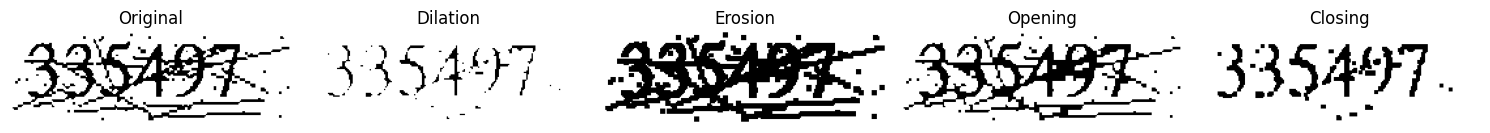

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import cv2
# ------------------------------
from morphology import *

In [30]:
### Usage ###
def load_binary_image(path, threshold=128):
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.medianBlur(gray_image, 1)
    # 2. 應用自適應閾值進行二值化
    binary_image = cv2.adaptiveThreshold(gray_image, 255, 
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY_INV, 
                                        91, 22)
    return binary_image
### Usage ###

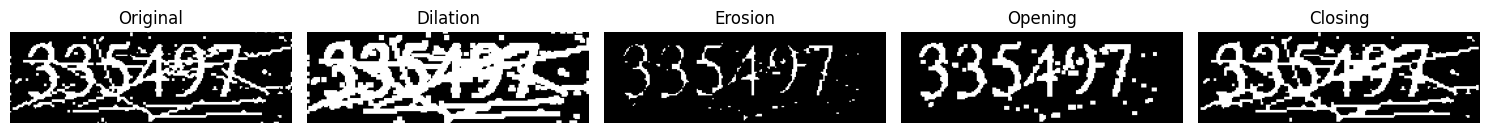

In [31]:
# 主程式流程
def show_results(original, dilated, eroded, opened, closed):
    titles = ['Original', 'Dilation', 'Erosion', 'Opening', 'Closing']
    images = [original, dilated, eroded, opened, closed]
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    kernel = array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ])
    path = 'images/335497.png'  # yours
    binary = load_binary_image(path)
    dilated = dilation(binary, kernel)  # Usage
    eroded = erosion(binary, kernel)    # Usage
    opened = opening(binary, kernel)    # Usage
    closed = closing(binary, kernel)    # Usage
    show_results(binary, dilated, eroded, opened, closed)

## 2. Filtering

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# -----------------------------
from filtering import *

In [33]:
### Usage ####
def gaussian_kernel(size=50, sigma=1.0):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
    return kernel / np.sum(kernel)
### Usage ####

### 2.1 Basic Filtering
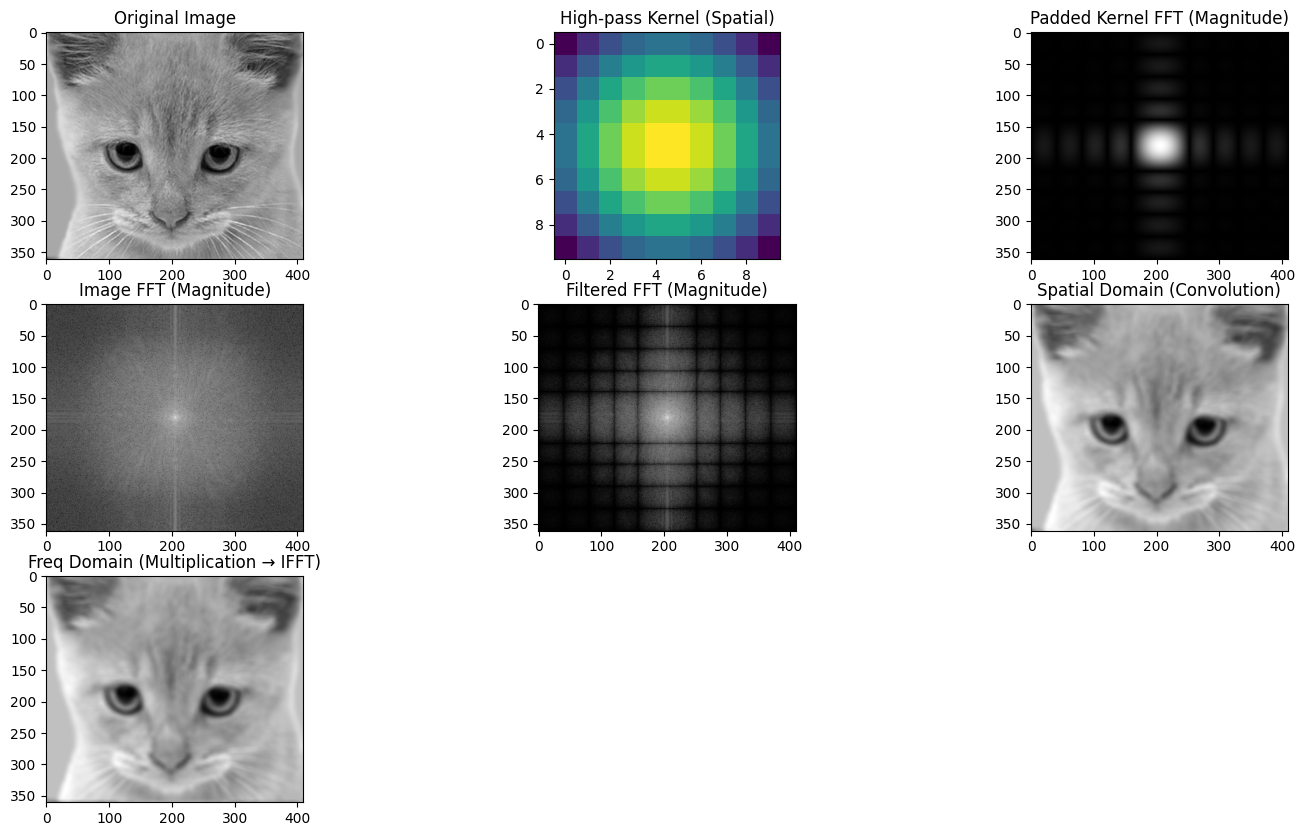

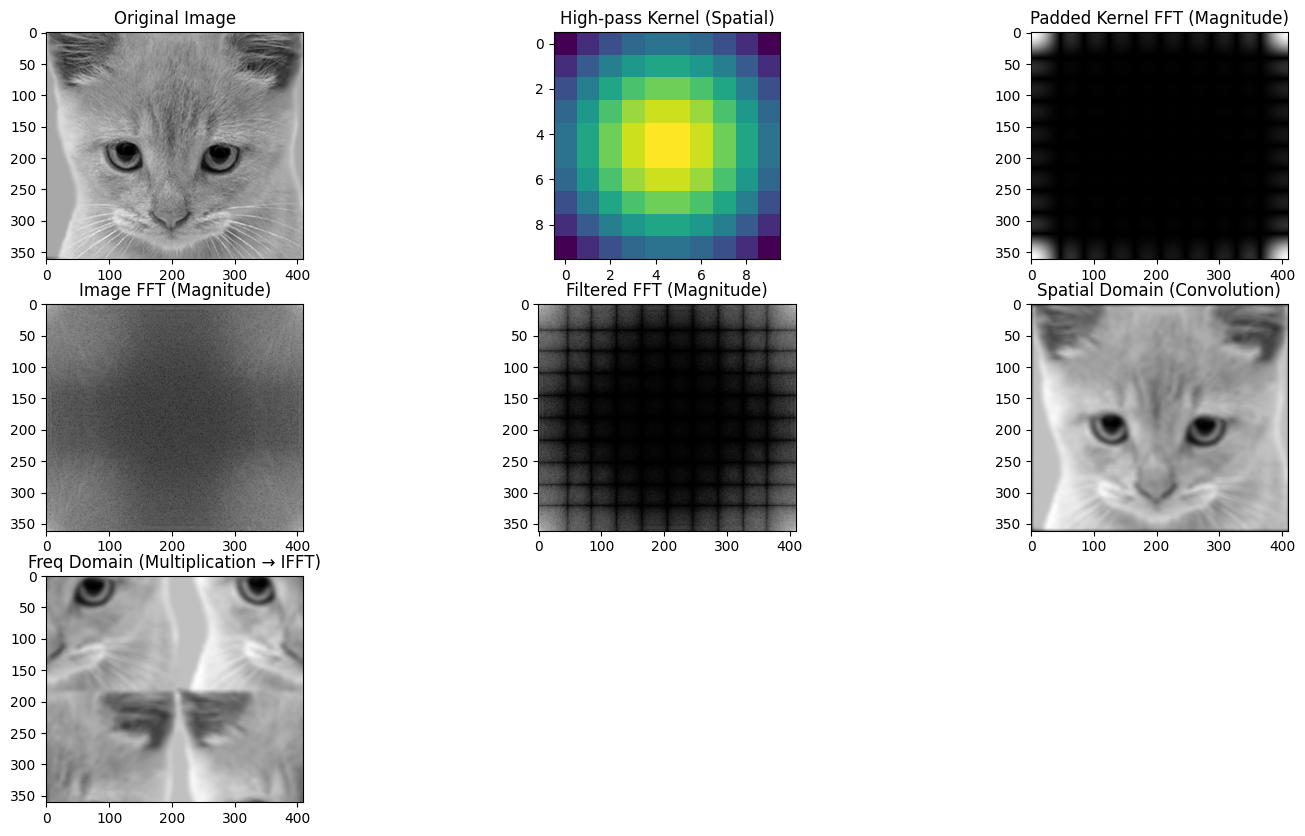

In [34]:
# Step 1: read
img = Image.open("images/cat.jpg").convert("L")                    
img_array = np.array(img)                                   # Usage



# Step 2:
kernel = np.array([[-2, -2, -2],
                   [ -2, -2, -2],
                   [ -2, -2, -2]])
kernel = gaussian_kernel(10, 5.0)
kernel = np.flipud(np.fliplr(kernel))

# Step 3: Filtering
## spatial domain
spatial_filtered = spatialdomain_filtering(img_array, kernel)                   # Usage
## frequency domain
freq_filtered, F_img, F_kernel = freqencydomain_filtering(img_array, kernel)    # Usage


# magnitude
magnitude_img = np.log1p(np.abs((F_img)))
magnitude_kernel = np.log1p(np.abs((F_kernel)))
magnitude_filtered = np.log1p(np.abs((F_img * F_kernel)))


# Step 4: plot
plt.figure(figsize=(18, 10))

plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(img_array, cmap='gray')

plt.subplot(3, 3, 2)
plt.title("High-pass Kernel (Spatial)")
plt.imshow(kernel)

plt.subplot(3, 3, 3)
plt.title("Padded Kernel FFT (Magnitude)")
plt.imshow(magnitude_kernel, cmap='gray')

plt.subplot(3, 3, 4)
plt.title("Image FFT (Magnitude)")
plt.imshow(magnitude_img, cmap='gray')

plt.subplot(3, 3, 5)
plt.title("Filtered FFT (Magnitude)")
plt.imshow(magnitude_filtered, cmap='gray')

plt.subplot(3, 3, 6)
plt.title("Spatial Domain (Convolution)")
plt.imshow(spatial_filtered, cmap='gray')

plt.subplot(3, 3, 7)
plt.title("Freq Domain (Multiplication → IFFT)")
plt.imshow(freq_filtered, cmap='gray')

# plt.tight_layout()
# plt.imshow(diff, cmap='hot')
# plt.title("Difference (Space - Freq)")
# plt.colorbar()
plt.show()

### 2.2 Hybrid Image

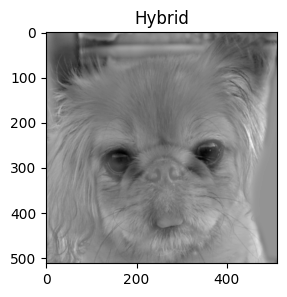 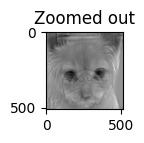

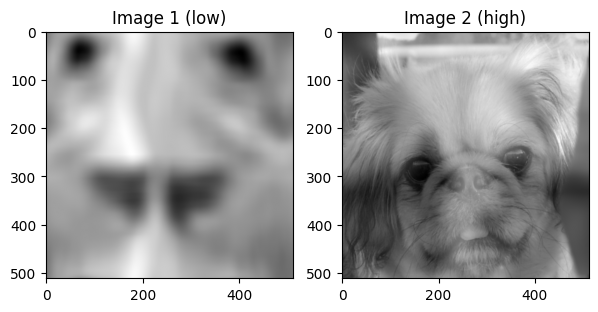

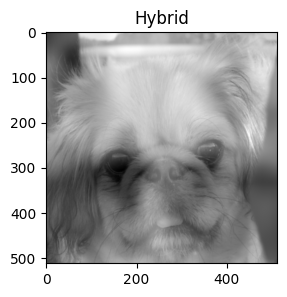

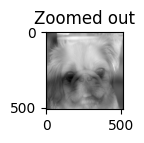

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 
img1 = cv2.imread('images/cat.jpg')
img2 = cv2.imread('images/dog.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

img1 = cv2.resize(img1, (512, 512))
img2 = cv2.resize(img2, (512, 512))

hybrid_image, low_frequencies, high_frequencies = freq_hybrid_imaging(img1, img2, gaussian_kernel(50, 25.0))

# 顯示結果
plt.figure(figsize=(7,7))
plt.subplot(1, 2, 1), plt.imshow(low_frequencies[...,::-1], cmap='gray'), plt.title('Image 1 (low)')
plt.subplot(1, 2, 2), plt.imshow(high_frequencies[...,::-1], cmap='gray'), plt.title('Image 2 (high)')

plt.figure(figsize=(3,3))
plt.imshow(hybrid_image[...,::-1], cmap='gray'), plt.title('Hybrid')
plt.figure(figsize=(1,1))
plt.imshow(hybrid_image[...,::-1], cmap='gray'), plt.title('Zoomed out')
plt.show()

# 3. Denoising Tasks

#### #Do Not Edit the following function, calculate_snr

In [36]:
import numpy as np
from denoising import *
def calculate_snr(original, noisy):
    original = original.astype(np.float32)
    noisy = noisy.astype(np.float32)

    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - noisy) ** 2)

    snr = 10 * np.log10(signal_power / noise_power)
    return snr

## 3.1 Denoising Tasks - Gaussian noise

#### Ver.2

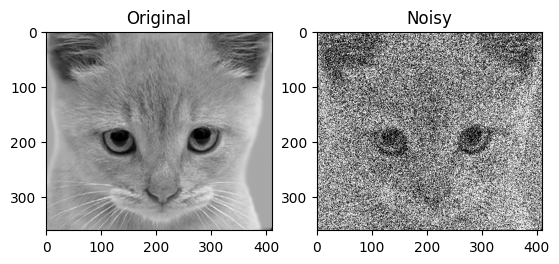

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/cat.jpg').astype(np.float32) / 255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Gaussian noise: please adjust the param.
mean = -0.01
std = 0.5 
noise = np.random.normal(mean, std, img.shape)


noisy_img = np.clip(img + noise, 0, 1)

# 顯示結果
plt.subplot(1,2,1), plt.imshow(img[..., ::-1], cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(noisy_img[..., ::-1], cmap='gray'), plt.title('Noisy')
plt.show()

In [38]:
denoisy_img = denoising_func(noisy_img)

snr_value = calculate_snr(img, noisy_img)
print(f"SNR: {snr_value:.2f} dB")

SNR: 4.19 dB


## 3.2 Denoising Tasks - Salt and Pepper

#### #Do Not Edit the Following Usage: 

In [39]:
def salt_and_pepper_noise(img, amount=0.01):
    noisy = img.copy()
    num_salt = int(amount * img.size * 0.5)
    num_pepper = int(amount * img.size * 0.5)

    # 加入 salt（白點）
    coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape[:2]]
    noisy[coords[0], coords[1]] = 1

    # 加入 pepper（黑點）
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape[:2]]
    noisy[coords[0], coords[1]] = 0

    return noisy

def load_binary_image(image):
    image 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.medianBlur(gray_image, 1)
    # 2. 應用自適應閾值進行二值化
    binary_image = cv2.adaptiveThreshold(gray_image, 255, 
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY_INV, 
                                        91, 22)
    return binary_image



#### #You can edit:

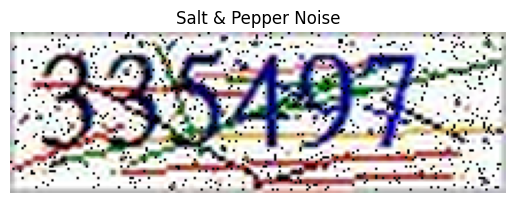

In [40]:
# 使用範例
img = cv2.imread('images/335497.png')
noisy_sp = salt_and_pepper_noise(img, amount=0.02)

plt.imshow(noisy_sp[..., ::-1])
plt.title('Salt & Pepper Noise')
plt.axis('off')
plt.show()

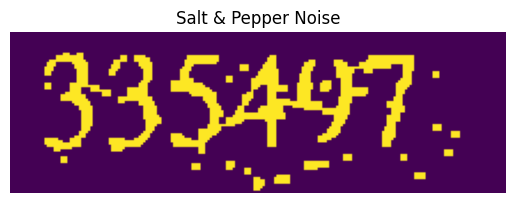

In [41]:
noisy_sp = load_binary_image(noisy_sp)
denoisy_img = deSaltPepper_func(noisy_sp)

plt.imshow(denoisy_img)
plt.title('Salt & Pepper Noise')
plt.axis('off')
plt.show()


## Example: how to use #Easyocr

In [42]:
import easyocr
from PIL import Image
import cv2

#---------- 參數 -------------------------------------------------------------#
flist = ['images/047874', 'images/075205']   # 測試影像（不含副檔名）
reader = easyocr.Reader(['en'], gpu='mps')   # OCR 讀取器
true_table = []

#---------- 主迴圈 -----------------------------------------------------------#
for f in flist:
    # 1. 讀圖
    imgcv = cv2.imread(f + '.png')

    # 2. 加入 salt‑and‑pepper 噪聲 → 二值化
    noisy_sp = salt_and_pepper_noise(imgcv, amount=0.02)
    noisy_sp = load_binary_image(noisy_sp)

    # 3. 去噪（針對 noisy_sp，而非原圖）
    result_image = deSaltPepper_func(noisy_sp)

    # 4. 存檔 & 顯示（Jupyter）
    tmp_path = f.split('/')[-1] + '_clean.png'   # → 047874_clean.png

    print(f'儲存檔案: {tmp_path}')
    cv2.imwrite(tmp_path, result_image)

    img = Image.open(tmp_path)
    img = img.resize((img.width * 2, img.height * 2), Image.Resampling.LANCZOS)
    display(img)

    # 5. OCR 只讀數字
    text = ''.join(
        reader.readtext(
            tmp_path,
            detail=0,
            allowlist='0123456789',
            batch_size=100,
            decoder='beamsearch'
        )
    )
    print(f'辨識結果: {text}')

    # 6. 與檔名最後 6 位（真正標籤）比對
    true_table.append(text == f[-6:])

print(true_table)


儲存檔案: 047874_clean.png


[ WARN:0@154.111] global loadsave.cpp:900 imwrite_ imwrite_('047874_clean.png'): can't open file for writing: permission denied


FileNotFoundError: [Errno 2] No such file or directory: '047874_clean.png'